In [1]:
import pandas as pd
df = pd.read_csv('AirPassengers.csv')


In [2]:
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [3]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
print(df.head())

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


In [4]:
df.index = df['Month']
del df['Month']
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Number of Passengers')

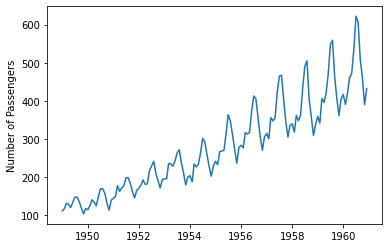

In [6]:
plt.plot(df)
plt.ylabel('Number of Passengers')

In [7]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

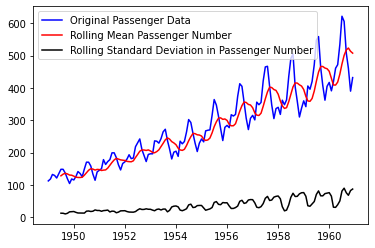

In [8]:
plt.plot(df, color='blue',label='Original Passenger Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean Passenger Number')
plt.plot(rolling_std, color='black', label = 'Rolling Standard Deviation in Passenger Number')
plt.legend(loc='best');

In [9]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df,autolag='AIC')

In [10]:
output_df = pd.DataFrame({'Values':[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , 'Metric':['Test Statistics','p-value','No. of lags used','Number of observations used',
'critical value (1%)', 'critical value (5%)', 'critical value (10%)']})
print(output_df)

       Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)


In [11]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [12]:
acf(df)
# plot_acf(df)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

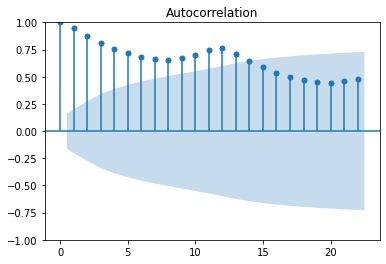

In [13]:
plot_acf(df)
plt.show()

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

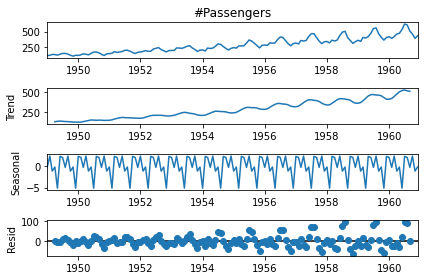

In [15]:
decompose = seasonal_decompose(df['#Passengers'],model='additive', period=7)
decompose.plot()
# plt.show()
plt.savefig('lksdf.png')

In [16]:
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

d:\Python Project\Machine learning projects\petrol proce prediction\petrol-price-forecasting\vnev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\Python Project\Machine learning projects\petrol proce prediction\petrol-price-forecasting\vnev\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


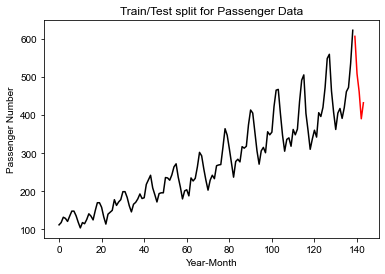

In [17]:
# df['Month'] = df.index
train = df[df['Month'] < '1960-08-01']
train.head()
train['train'] = train['#Passengers']
train.head()
del train['Month']
del train['#Passengers']
test = df[df['Month'] >= '1960-08-01']
del test['Month']
test['test'] = test['#Passengers']
del test['#Passengers']
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.title('Train/Test split for Passenger Data')
plt.ylabel('Passenger Number')
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [18]:
train

,train
0,112
1,118
2,132
3,129
4,121
...,...
134,419
135,461
136,472
137,535


In [19]:
import numpy as np

In [20]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
# forecast = model.predict(n_periods=15)
# forecast = pd.DataFrame(forecast,index =np.arange(140, 155),columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [21]:
((model.resid()**2).mean())**(1/2)

28.175454272421348

In [22]:
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

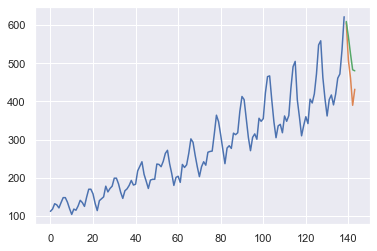

In [23]:
plt.plot(train)
plt.plot(test)
plt.plot(forecast)

In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print('RMSE: ', rms)

RMSE:  61.36465503852935


In [25]:
import pickle as pkl

In [26]:
with open('model.pkl', 'wb') as md:
    pkl.dump(model, md)

In [27]:
with open('model.pkl', 'rb') as md:
     mod = pkl.load(md)

In [28]:
mod.predict(5)

139    609.537798
140    569.573135
141    524.517321
142    483.041669
143    480.302539
dtype: float64

In [ ]:
mod.seasonal_order